<a href="https://colab.research.google.com/github/iam-pattan/DL/blob/master/NLP_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imp libraries
> Gensim
> NLTK
> spaCy
> TextBlob

## PART-1 tf


In [ ]:
import nltk
import gensim

In [ ]:
import tensorflow.keras.layers as tfl
import tensorflow.keras.preprocessing as tfp
import tensorflow.keras.applications as tfa
import tensorflow.keras.models as tfm
import tensorflow.keras.preprocessing.sequence as tfps

dir(tfps)

['TimeseriesGenerator',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'make_sampling_table',
 'pad_sequences',
 'skipgrams']

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
sent=['those movies are great',
      'Hell of a movie that we watched',
      'That girl is not fun anymore',
      'Crazy like an old monk',
      'Sublte thoughts you\'ve',
      'I\'ll make him into pieces, if he likes to mess with me']

In [ ]:
voc_size = 1000
one_hot_repr = [one_hot(words, voc_size) for words in sent]

In [ ]:
one_hot_repr

[[432, 39, 36, 978],
 [257, 166, 402, 950, 646, 41, 932],
 [646, 627, 820, 526, 197],
 [817, 51, 718, 57, 53],
 [937, 642, 678],
 [902, 557, 848, 197, 205, 824, 67, 664, 249, 222, 587, 933]]

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
import numpy as np

In [ ]:
sent_len = 12
embd_doc = pad_sequences(one_hot_repr, padding='pre', maxlen=sent_len)
embd_doc

array([[  0,   0,   0,   0,   0,   0,   0,   0, 432,  39,  36, 978],
       [  0,   0,   0,   0,   0, 257, 166, 402, 950, 646,  41, 932],
       [  0,   0,   0,   0,   0,   0,   0, 646, 627, 820, 526, 197],
       [  0,   0,   0,   0,   0,   0,   0, 817,  51, 718,  57,  53],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 937, 642, 678],
       [902, 557, 848, 197, 205, 824,  67, 664, 249, 222, 587, 933]],
      dtype=int32)

In [ ]:
dim=10
model=Sequential()
model.add(Embedding(voc_size,10,input_length=sent_len))
model.compile('adam','mse')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 12, 10)            10000     
Total params: 10,000
Trainable params: 10,000
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(model.predict(embd_doc))

[[[ 0.03389866  0.02160561  0.00473062 -0.02139168  0.00426587
    0.01886358  0.03895006  0.03758618 -0.0073604  -0.02920833]
  [ 0.03389866  0.02160561  0.00473062 -0.02139168  0.00426587
    0.01886358  0.03895006  0.03758618 -0.0073604  -0.02920833]
  [ 0.03389866  0.02160561  0.00473062 -0.02139168  0.00426587
    0.01886358  0.03895006  0.03758618 -0.0073604  -0.02920833]
  [ 0.03389866  0.02160561  0.00473062 -0.02139168  0.00426587
    0.01886358  0.03895006  0.03758618 -0.0073604  -0.02920833]
  [ 0.03389866  0.02160561  0.00473062 -0.02139168  0.00426587
    0.01886358  0.03895006  0.03758618 -0.0073604  -0.02920833]
  [ 0.03389866  0.02160561  0.00473062 -0.02139168  0.00426587
    0.01886358  0.03895006  0.03758618 -0.0073604  -0.02920833]
  [ 0.03389866  0.02160561  0.00473062 -0.02139168  0.00426587
    0.01886358  0.03895006  0.03758618 -0.0073604  -0.02920833]
  [ 0.03389866  0.02160561  0.00473062 -0.02139168  0.00426587
    0.01886358  0.03895006  0.03758618 -0.007360

In [ ]:
print(model.predict(embd_doc)[0])

[[ 0.03389866  0.02160561  0.00473062 -0.02139168  0.00426587  0.01886358
   0.03895006  0.03758618 -0.0073604  -0.02920833]
 [ 0.03389866  0.02160561  0.00473062 -0.02139168  0.00426587  0.01886358
   0.03895006  0.03758618 -0.0073604  -0.02920833]
 [ 0.03389866  0.02160561  0.00473062 -0.02139168  0.00426587  0.01886358
   0.03895006  0.03758618 -0.0073604  -0.02920833]
 [ 0.03389866  0.02160561  0.00473062 -0.02139168  0.00426587  0.01886358
   0.03895006  0.03758618 -0.0073604  -0.02920833]
 [ 0.03389866  0.02160561  0.00473062 -0.02139168  0.00426587  0.01886358
   0.03895006  0.03758618 -0.0073604  -0.02920833]
 [ 0.03389866  0.02160561  0.00473062 -0.02139168  0.00426587  0.01886358
   0.03895006  0.03758618 -0.0073604  -0.02920833]
 [ 0.03389866  0.02160561  0.00473062 -0.02139168  0.00426587  0.01886358
   0.03895006  0.03758618 -0.0073604  -0.02920833]
 [ 0.03389866  0.02160561  0.00473062 -0.02139168  0.00426587  0.01886358
   0.03895006  0.03758618 -0.0073604  -0.02920833]


## PART-2 spaCy



In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Process whole documents
text = ("When Sebastian Thrun started working on self-driving cars at "
        "Google in 2007, few people outside of the company took him "
        "seriously. “I can tell you very senior CEOs of major American "
        "car companies would shake my hand and turn away because I wasn’t "
        "worth talking to,” said Thrun, in an interview with Recode earlier "
        "this week.")
doc = nlp(text)

In [ ]:
# Analyze syntax
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

Noun phrases: ['Sebastian Thrun', 'self-driving cars', 'Google', 'few people', 'the company', 'him', 'I', 'you', 'very senior CEOs', 'major American car companies', 'my hand', 'I', 'Thrun', 'an interview', 'Recode']
Verbs: ['start', 'work', 'drive', 'take', 'can', 'tell', 'would', 'shake', 'turn', 'talk', 'say']


In [ ]:
# Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.text, entity.label_)

Sebastian NORP
Google ORG
2007 DATE
American NORP
Recode ORG
earlier this week DATE


In [ ]:
tags = doc.count_by(spacy.attrs.TAG)
for tag, count in tags.items():
  print(f'{tags}. {doc.vocab[tag].text:{4}}:{count}')

{15267657372422890137: 2, 15794550382381185553: 5, 15308085513773655218: 4, 13927759927860985106: 2, 5595707737748328492: 1, 14200088355797579614: 1, 1292078113972184607: 2, 1534113631682161808: 2, 272890857012483650: 1, 12646065887601541794: 1, 10554686591937588953: 1, 8214596291009089021: 1, 783433942507015291: 1, 9188597074677201817: 1}. DT  :2
{15267657372422890137: 2, 15794550382381185553: 5, 15308085513773655218: 4, 13927759927860985106: 2, 5595707737748328492: 1, 14200088355797579614: 1, 1292078113972184607: 2, 1534113631682161808: 2, 272890857012483650: 1, 12646065887601541794: 1, 10554686591937588953: 1, 8214596291009089021: 1, 783433942507015291: 1, 9188597074677201817: 1}. NNP :5
{15267657372422890137: 2, 15794550382381185553: 5, 15308085513773655218: 4, 13927759927860985106: 2, 5595707737748328492: 1, 14200088355797579614: 1, 1292078113972184607: 2, 1534113631682161808: 2, 272890857012483650: 1, 12646065887601541794: 1, 10554686591937588953: 1, 8214596291009089021: 1, 78343

In [ ]:
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [ ]:
len(nlp.Defaults.stop_words)

326

In [ ]:
nlp.vocab['myself'].is_stop

True

In [ ]:
nlp.Defaults.stop_words.remove('myself')
nlp.Defaults.stop_words.add('beyond')

###### stopwords in nltk


In [ ]:
import string
import re
import nltk
nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
text = 'The hand is full of magic and power!'
tokens = word_tokenize(text)
tokens

['The', 'hand', 'is', 'full', 'of', 'magic', 'and', 'power', '!']

In [ ]:
text.split()

['The', 'hand', 'is', 'full', 'of', 'magic', 'and', 'power!']

In [ ]:
tokens = [words.lower() for words in tokens]
tokens

['the', 'hand', 'is', 'full', 'of', 'magic', 'and', 'power', '!']

In [ ]:
re_punc = re.compile('[%s]'% re.escape(string.punctuation))
re_punc

re.compile(r'[!"\#\$%\&\'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~]',
re.UNICODE)

In [ ]:
stripped = [re_punc.sub('', w) for w in tokens]
stripped

['the', 'hand', 'is', 'full', 'of', 'magic', 'and', 'power', '']

In [ ]:
words = [words for words in stripped if words.isalpha()]
words

['the', 'hand', 'is', 'full', 'of', 'magic', 'and', 'power']

In [ ]:
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['hand', 'full', 'magic', 'power']

#### back to spaCy

In [ ]:
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

In [ ]:
pat1 = [{'lower': 'solarpower'}]
pat2 = [{"lower": 'solar'}, {'lower': 'power'}]
pat3 = [{"lower": 'solar'}, {'IS_PUNCT': True}, {'lower': 'power'}]
matcher.add('SolarPower', None, pat1, pat2, pat3)

In [ ]:
doc = nlp(u'The Solar Power industry continues to grow as the green fuels usage \
is increasing for solarpower increase. Solar-Power cars are gaining popularity')

In [ ]:
found_matches = matcher(doc)
print(found_matches)

[(8656102463236116519, 1, 3), (8656102463236116519, 15, 16), (8656102463236116519, 18, 21)]


In [ ]:
for index, start, end in found_matches:
  str_id = nlp.vocab.strings[index]
  span = doc[start:end]
  print(index, str_id, start, end, span.text)

8656102463236116519 SolarPower 1 3 Solar Power
8656102463236116519 SolarPower 15 16 solarpower
8656102463236116519 SolarPower 18 21 Solar-Power


In [ ]:
pat1 = [{'lower': 'solarpower'}]
pat2 = [{"lower": 'solar'}, {'lower': 'power'}]
pat3 = [{"lower": 'solar'}, {'IS_PUNCT': True, 'OP': '*'}, {'LEMMA': 'power'}]
matcher.add('SolarPower', None, pat1, pat2, pat3)

In [ ]:
doc2 = nlp(u' Solar-Powered cars are gaining popularity')

In [ ]:
found_matches = matcher(doc2)
print(found_matches)

[(8656102463236116519, 1, 4)]


In [ ]:
for index, start, end in found_matches:
  str_id = nlp.vocab.strings[index]
  span = doc2[start:end]
  print(index, str_id, start, end, span.text)

8656102463236116519 SolarPower 1 4 Solar-Powered


In [ ]:
from spacy.matcher import PhraseMatcher 
matcher = PhraseMatcher(nlp.vocab, attr='LOWER')

In [ ]:
terms = ['Galaxy', 'Iphone', 'Xiaomi', 'Oneplus']
patterns = [nlp(text) for text in terms]
matcher.add('TerminologyList', None, *patterns)

In [ ]:
text = nlp(u'Glowing review overall, and some really interesting side-by-side'
           'Photography tests pitting the iphone against the'
           'Galaxy series and last year Pixel series')
matches = matcher(text)
matches

[(3766102292120407359, 16, 17)]

In [ ]:
match_id, start, end = matches[0]
text[start:end].text, nlp.vocab.strings[match_id]

('iphone', 'TerminologyList')

#### tagging

In [ ]:
txt = nlp(u'Hello world of NLP, use Deep Pavlov for chatbot')
for token in txt:
  print(f'{token.text:{16}} {token.pos_:{14}} {token.lemma_:{12}} {token.tag_:{10}} {token.dep_:{8}} {token.shape_:{6}} {token.is_alpha:{4}} {token.is_stop:{2}}')

Hello            INTJ           hello        UH         compound Xxxxx     1  0
world            NOUN           world        NN         nsubj    xxxx      1  0
of               ADP            of           IN         prep     xx        1  1
NLP              PROPN          NLP          NNP        pobj     XXX       1  0
,                PUNCT          ,            ,          punct    ,         0  0
use              VERB           use          VB         ROOT     xxx       1  0
Deep             ADJ            deep         JJ         compound Xxxx      1  0
Pavlov           PROPN          Pavlov       NNP        dobj     Xxxxx     1  0
for              ADP            for          IN         prep     xxx       1  1
chatbot          NOUN           chatbot      NN         pobj     xxxx      1  0


In [ ]:
spacy.explain(token.tag_)

'noun, singular or mass'

In [ ]:
pos_count = txt.count_by(spacy.attrs.POS)
pos_count

{84: 1, 85: 2, 91: 1, 92: 2, 96: 2, 97: 1, 100: 1}

In [ ]:
txt.vocab[83].text

'LANG'

In [ ]:
for ind, val in sorted(pos_count.items()):
  print(f'{ind}. {txt.vocab[ind].text:{4}}: {val}')

84. ADJ : 1
85. ADP : 2
91. INTJ: 1
92. NOUN: 2
96. PROPN: 2
97. PUNCT: 1
100. VERB: 1


#### displacy usage

In [ ]:
from spacy import displacy

In [ ]:
displacy.render(txt, style='ent', jupyter=True, options={'distance':110})

In [ ]:
displacy.render(txt, style='dep', jupyter=True, options={'distance':110})

## Part-3 
Sentiment analysis(Messing with things here 😉) 

In [ ]:
# !gdown --id 0B04GJPshIjmPRnZManQwWEdTZjg

Downloading...
From: https://drive.google.com/uc?id=0B04GJPshIjmPRnZManQwWEdTZjg
To: /content/trainingandtestdata.zip
81.4MB [00:00, 122MB/s] 


In [ ]:
# !unzip '/content/trainingandtestdata.zip'

Archive:  /content/trainingandtestdata.zip
  inflating: testdata.manual.2009.06.14.csv  
  inflating: training.1600000.processed.noemoticon.csv  


In [ ]:
train_path = 'https://raw.githubusercontent.com/AnubhavJohri/Twitter-US-Airline-Sentiment-Analysis/master/Twitter%20US%20Airline%20Sentiment%20Analysis/Dataset/training_data.csv'

test_path = 'https://raw.githubusercontent.com/AnubhavJohri/Twitter-US-Airline-Sentiment-Analysis/master/Twitter%20US%20Airline%20Sentiment%20Analysis/Dataset/test_data.csv'

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(train_path, error_bad_lines=False)
test = pd.read_csv(test_path, error_bad_lines=False)

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567900433542488064,negative,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada)
1,569989168903819264,positive,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada)
2,568089179520954368,positive,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada)
3,568928195581513728,negative,Southwest,NaN,amccarthy19,NaN,0,@SouthwestAir @dultch97 that's horse radish 😤🐴,NaN,2015-02-20 16:20:26 -0800,NaN,Atlantic Time (Canada)
4,568594180014014464,negative,United,NaN,J_Okayy,NaN,0,@united so our flight into ORD was delayed bec...,NaN,2015-02-19 18:13:11 -0800,NaN,Eastern Time (US & Canada)


In [ ]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
df.drop(['tweet_id', 'airline_sentiment_gold', 'negativereason_gold', 'retweet_count', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone'], axis=1, inplace=True)

In [ ]:
df.airline_sentiment.replace({'negative': 1, 'positive': 2, 'neutral': 0}, inplace=True)

In [ ]:
df.airline_sentiment = df.airline_sentiment.astype('int')

In [ ]:
df.head()

,airline_sentiment,airline,name,text
0,1,Southwest,ColeyGirouard,"@SouthwestAir I am scheduled for the morning, ..."
1,2,Southwest,WalterFaddoul,@SouthwestAir seeing your workers time in and ...
2,2,United,LocalKyle,@united Flew ORD to Miami and back and had gr...
3,1,Southwest,amccarthy19,@SouthwestAir @dultch97 that's horse radish 😤🐴
4,1,United,J_Okayy,@united so our flight into ORD was delayed bec...


In [ ]:
df.isna().sum()
class_count = df.airline_sentiment.value_counts()

In [ ]:
df.loc[df.airline_sentiment == 1].count(), df.loc[df.airline_sentiment == -1].count(), df.loc[df.airline_sentiment == 0].count()

(airline_sentiment    6851
 airline              6851
 name                 6851
 text                 6851
 dtype: int64, airline_sentiment    0
 airline              0
 name                 0
 text                 0
 dtype: int64, airline_sentiment    2327
 airline              2327
 name                 2327
 text                 2327
 dtype: int64)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


Text(0, 0.5, 'Number of reviews ')

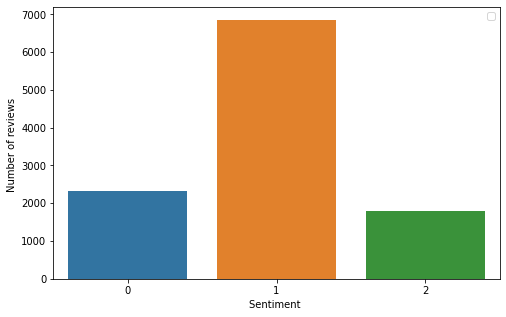

In [ ]:
x = np.array(class_count.index)
y = np.array(class_count.values)
plt.figure(figsize=(8,5))
sns.barplot(x,y)
plt.legend()
plt.xlabel('Sentiment ')
plt.ylabel('Number of reviews ')

In [ ]:
df.airline.unique()

array(['Southwest', 'United', 'Delta', 'US Airways', 'American',
       'Virgin America'], dtype=object)

In [ ]:
planes = ['Southwest', 'United', 'Delta', 'US Airways', 'American',
       'Virgin America']
for i in planes: 
  print('Count of reviews for: ', i)
  print('Positive -->', df.loc[(df.airline_sentiment == 1) & (df.airline == i)].count())
  print('Negative -->', df.loc[(df.airline_sentiment == -1) & (df.airline == i)].count())
  print('Neutral -->', df.loc[(df.airline_sentiment == 0) & (df.airline == i)].count(), end='\n\n\n')

Count of reviews for:  Southwest
Positive --> airline_sentiment    870
airline              870
name                 870
text                 870
dtype: int64
Negative --> airline_sentiment    0
airline              0
name                 0
text                 0
dtype: int64
Neutral --> airline_sentiment    512
airline              512
name                 512
text                 512
dtype: int64


Count of reviews for:  United
Positive --> airline_sentiment    2011
airline              2011
name                 2011
text                 2011
dtype: int64
Negative --> airline_sentiment    0
airline              0
name                 0
text                 0
dtype: int64
Neutral --> airline_sentiment    517
airline              517
name                 517
text                 517
dtype: int64


Count of reviews for:  Delta
Positive --> airline_sentiment    691
airline              691
name                 691
text                 691
dtype: int64
Negative --> airline_sentiment    0


In [ ]:
df.text = df.text.astype("string")

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import re
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import spacy
from tqdm.notebook import tqdm

nlp = spacy.load("en_core_web_sm")

In [ ]:
# for i in range(len(df)):
#   token = sent_tokenize(df.text[i])
#   print(f'token_{i}: {token}')

In [ ]:
lis = []
for i in tqdm(range(len(df))):
  tokens = word_tokenize(df.text[i])
  re_punc = re.compile('[%s]'% re.escape(string.punctuation))
  stripped = [re_punc.sub('', w) for w in tokens]
  words = [words for words in stripped if words.isalpha()]
  stop_words = set(stopwords.words('english'))
  lis.append([w for w in words if not w in stop_words])

In [ ]:
len(lis), len(df)

(10980, 10980)

In [ ]:
onehot_repr = [one_hot(str(line), 10000) for line in lis] 
print(onehot_repr)

[[5830, 2960, 4523, 5373, 4066, 2161, 4118, 4806, 7074, 5371, 2629, 522, 9728], [5830, 5410, 8142, 3890, 3890, 5463, 114, 2960, 9737, 4966, 5339, 986], [5456, 8352, 5132, 4688, 9591, 8377, 1833, 631, 7157, 4273], [5830, 6692, 8231], [5456, 5371, 5132, 644, 9983, 9199, 2629, 1100, 5371, 8505, 5876, 7947], [5456, 1472, 8860, 6930, 4966, 9859, 167, 2494, 1801, 7056, 5371, 7100, 114, 9320], [870, 3428, 7009, 5207, 6062, 2920, 3395, 4494, 5276, 3385, 372, 7216, 5276, 8582, 9591], [870, 7959, 5253, 3379, 1586, 2426, 2038, 9257, 8503, 8249, 1089, 3493, 1285, 9255, 8141], [5456, 8264, 100, 9026, 631, 55, 9711, 6173, 6022, 9116, 3898, 3201, 5456], [5830, 4703, 391, 3201, 2629, 399, 1479, 2075, 5359, 5818, 6491], [5830, 151, 4261, 2675, 5371, 9592, 8159, 1307, 8448, 2563, 522, 3718, 5456, 2034, 8160, 522, 5371, 1162], [870, 8790, 1238, 8487, 8485, 8423, 9648, 2960, 8487, 2629, 7947, 2960, 8487, 2629, 2702, 4273], [2034, 9737, 2136, 997, 1840, 9661, 4934, 1927, 9152, 6194, 3888], [5830, 2960, 316

In [ ]:
embedded_docs = pad_sequences(onehot_repr,padding='pre')
print(embedded_docs)

[[   0    0    0 ... 2629  522 9728]
 [   0    0    0 ... 4966 5339  986]
 [   0    0    0 ...  631 7157 4273]
 ...
 [   0    0    0 ...   55 2675 9566]
 [   0    0    0 ... 8031 7201 2034]
 [   0    0    0 ... 5371 9093 3019]]


In [ ]:
model=Sequential()
model.add(Embedding(10000,100,input_length = len(lis)))
model.compile('adam','mse')

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 10980, 100)        1000000   
Total params: 1,000,000
Trainable params: 1,000,000
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(model.predict(embedded_docs))

[[[-0.01522046  0.04423118  0.04654292 ...  0.03082992 -0.03949087
   -0.01209201]
  [-0.01522046  0.04423118  0.04654292 ...  0.03082992 -0.03949087
   -0.01209201]
  [-0.01522046  0.04423118  0.04654292 ...  0.03082992 -0.03949087
   -0.01209201]
  ...
  [ 0.00122759 -0.02748237  0.01963489 ...  0.04938433  0.00506102
   -0.00483053]
  [-0.02266892  0.00993834 -0.02990091 ...  0.01828519  0.03902106
    0.03952726]
  [-0.01679146 -0.04294616  0.00963447 ... -0.03796028  0.01532776
   -0.02752093]]

 [[-0.01522046  0.04423118  0.04654292 ...  0.03082992 -0.03949087
   -0.01209201]
  [-0.01522046  0.04423118  0.04654292 ...  0.03082992 -0.03949087
   -0.01209201]
  [-0.01522046  0.04423118  0.04654292 ...  0.03082992 -0.03949087
   -0.01209201]
  ...
  [ 0.01435344 -0.01528082  0.03920317 ... -0.03692184 -0.02268124
   -0.01905739]
  [ 0.00584817  0.03187627  0.00015855 ...  0.02689135  0.04861616
   -0.01868629]
  [ 0.01297381 -0.03084513  0.03222818 ... -0.02152796  0.00619426
   -0.